Introduction
this is a  binary classification problem where we predict whether the customer is going to exit any particular bank/company or not where they are used the products so if they dont want them to exit the bank they should provide some more services  so we will create a model to predict whether cstomer will exit the bank or not

**IMPLEMENTATION OF ANN**

In [85]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [86]:
# Step 1: Install TensorFlow
!pip install tensorflow

# Step 2: Verify GPU Availability
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if GPU is available
print("GPU available:", tf.test.is_gpu_available())

# Print GPU device name
print("GPU device name:", tf.test.gpu_device_name())

TensorFlow version: 2.17.1
GPU available: False
GPU device name: 


**IMPORT NECESSARY LIBRARIES**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [88]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [89]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


here in above o/p 'Exited' is dependent feature while others are independent features

In [90]:
#now we need to split the dataset in independent and dependet features
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

here for X : [:,3:13] beacuse we want all rows and features from 3 to row 12. in iloc indexing starts from zero and ends with digit next to the features row for example if last column number is 12 then we will write 13 and indexing starts from 0, 1, 2 , 3 and so on.  
and for Y : we selected [:,13] beacuse we want all rows and only want 13th column(feaure) the last one which is dependent one

here we do not need to focus on first three features ie.'RowNumber',	'CustomerId',	'Surname' beacuse they wont contribute much to model building while remaning features like 'CreditScore',	'Geography',	'Gender', 'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary' which will be our independent features

In [91]:
#Inspecting data
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [92]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


here in this  data we have a categorical features like 'Geography',	'Gender' so we can use one hot encoding for them or use get_dummies in panda

#Feature Engineering


In [93]:
Geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
Gender=pd.get_dummies(X['Gender'],drop_first=True ,dtype=int)

'drop_first=True' is used here beacuse to remove first column france from here so that there are only two columns germany and france who respresent all three columns

and dtype=int beacuse we want values to be 0 and 1 instead of true or false.

In [94]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [95]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [96]:
#concatinate this variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [97]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [98]:
pd.concat([X, Geography, Gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [99]:
#ASSIGN THE PREVIOUS CELL VALUE X WHICH WAS PREVIOS X OUR INDEPENDENT FEATURES
X=pd.concat([X, Geography, Gender],axis=1)

**SPLITTING THE DATASET INTO TRAIN TEST SPLIT**

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [101]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [102]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [103]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [104]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

**BUILDING ANN MODEL**

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

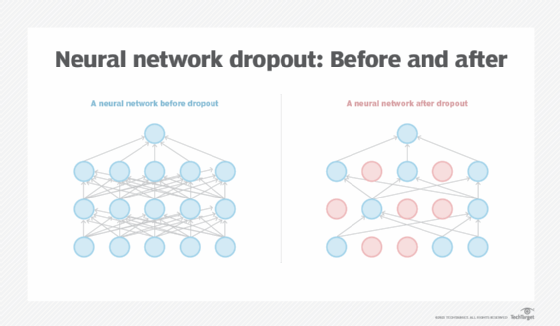

 neurons help to solve complex problem as this is a binary classification problem by forward and backward propogation and by continiously monitoring the loss function , using optimizers

  here

 1)we use sequential beacuse ofr forward and backward propogation

2)Dense is used to create dense i/p, hidden and o/p layers

3)LeakyReLU,PReLU,ELU,ReLU are all activation functions used in hidden layer.

4)Droput is used to drop neurons, from above diagram tou can see on left side we have previous neural network and on right side is neural network after some neurons were deactivated or dead so the neurons will be reomoves from model and so the layer will be cutoff between them, it will be of no use and this way entire traing process will go ahead. whenever we are using dropout layer we try to reduce overfitting.so here we use ropout layer like normalization(L1,L2 Norm ) in Machine Learning

In [106]:
#INITIALIZING ANN
classifier=Sequential()

In [107]:
#Adding i/p layer
classifier.add(Dense(units=11,activation='relu'))

In [108]:
#Adding 3 hidden layers
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [109]:
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [110]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [111]:
#Adding o/p layer
classifier.add(Dense(units=1,activation='sigmoid'))

from X_train.shape we can we there ar 11 inputs so in input layer wi'll have 11 nodes in i/p and in o/p layer as it is a classifvction problem so units=1 and activation function used here  in o/p layer is sigmoid

In [112]:
#Traing the model
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )

in above step we first compile the entire neural netwrok and use adam optimizer which is best optimizer  beacuse it solves smoothening problem and makes sure learning rate is adaptive while reaching global minima in gradient descent graph.

in here while using adam ,adam has a default learning rate of 0.1  
and as this is a binary classification problem we use loss function as binary_cross_entropy and accuracy is evaluation metrics.

In [113]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [76]:
#Train NN
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7447 - loss: 0.6082 - val_accuracy: 0.7955 - val_loss: 0.5015
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7945 - loss: 0.5197 - val_accuracy: 0.7955 - val_loss: 0.4915
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8002 - loss: 0.4930 - val_accuracy: 0.7955 - val_loss: 0.4717
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7850 - loss: 0.4966 - val_accuracy: 0.7955 - val_loss: 0.4498
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7976 - loss: 0.4652 - val_accuracy: 0.7955 - val_loss: 0.4368
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8094 - loss: 0.4412 - val_accuracy: 0.7959 - val_loss: 0.4223
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8091 - loss: 0.4406 - val_accuracy: 0.7993 - val_loss: 0.4116
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7992 - loss: 0.4394 - 

here we have selected 1000 epoches but we know after some time the result will be stagnent so we will use early stopping.

In [77]:
#To see parameters focused
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

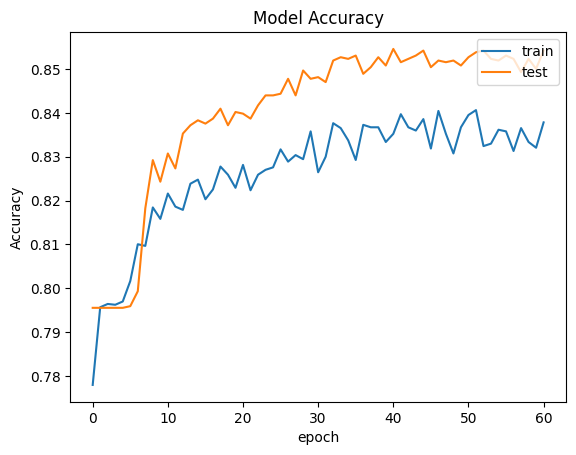

In [78]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

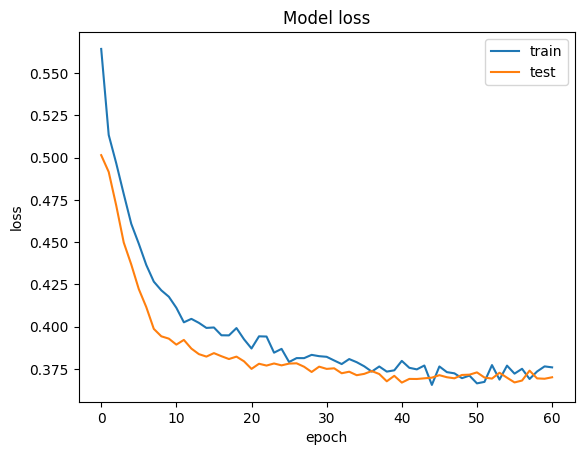

In [79]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

**Predicting on Test Data**

In [80]:
Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [81]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)

In [82]:
cm

array([[1525,   70],
       [ 214,  191]])

In [83]:
#calculate Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
score

0.858

In [84]:
#Get the Weights
classifier.get_weights()

[array([[-1.55333132e-01, -1.13182038e-01,  1.09645873e-01,
          3.68294567e-02, -4.59205639e-03,  2.84451276e-01,
         -1.64702460e-02,  3.56704980e-01, -2.36808181e-01,
         -6.26784787e-02,  1.92279890e-01],
        [-9.41132903e-02,  4.11695629e-01, -7.99290359e-01,
          2.65168488e-01,  5.39045259e-02, -2.57003248e-01,
          5.48208058e-01,  1.11552160e-02, -8.02261412e-01,
         -7.07593143e-01, -2.64759541e-01],
        [ 8.28069542e-03, -1.69632345e-01,  8.92610988e-05,
         -2.12008193e-01,  9.65054855e-02,  1.46485433e-01,
          8.11525434e-02, -3.04413624e-02, -2.93456942e-01,
          1.00627184e-01,  3.56096238e-01],
        [-6.85115874e-01,  1.36739105e-01, -1.60886347e-01,
          3.65455538e-01,  8.31431225e-02, -4.35129881e-01,
         -1.79670855e-01,  7.86850378e-02, -3.30101326e-03,
         -2.53486037e-02, -7.62532353e-01],
        [-1.15213108e+00, -1.23090923e+00,  9.18601528e-02,
          2.18532190e-01,  1.06904984e+00, -